In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
name = None

input image


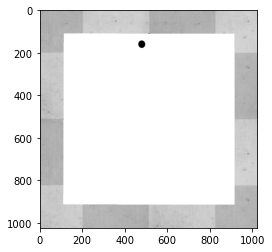

Gtay


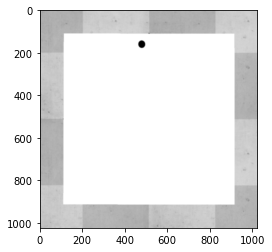

thresh


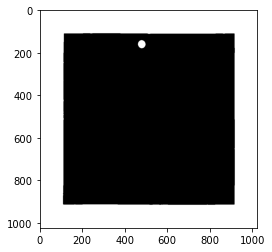

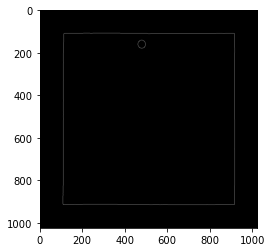

[[112. 110.]
 [913. 110.]
 [913. 913.]
 [108. 912.]]


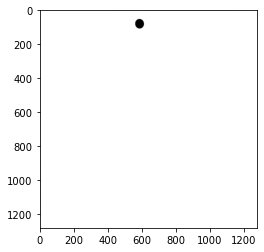

In [7]:
#time

#name = str(i) +".png"

img = cv.imread("transformimage.png",0)
print("input image")
plt.imshow(img,cmap='gray')
plt.show()
gray = cv.GaussianBlur(img, (5,5), 2)
print("Gtay")
plt.imshow(gray,cmap='gray')
plt.show()
	
	

ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
print("thresh")
plt.imshow(thresh1,cmap='gray')
plt.show()
	#Applying Canny Edge Detection
    #edged = cv.Canny(thresh1, 50, 200)
	
	#Applying Canny Edge Detection
edged = cv.Canny(thresh1, 50, 200)
plt.imshow(edged,cmap='gray')
plt.show()
	

					



	#Finding Contours 
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
		


	#Sorting the Contours in decreasing order because Square containing the Maze is largest
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
       
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            screenCnt = approx
            break
pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect
print(rect)
maxWidth = 1280



	#Findinf Maximum height

	
maxHeight = 1280

	#Destination Array of ROI
	

dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(img, M, (maxWidth, maxHeight))
plt.imshow(warped_img,cmap='gray')
plt.show()



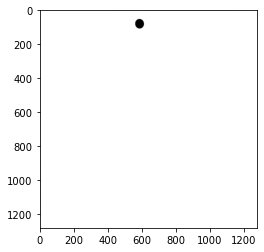

Wall time: 435 ms


In [8]:
%%time
plt.imshow(warped_img,cmap='gray')
cv.imwrite("perspec.png",warped_img)
plt.show()

In [9]:
print(warped_img.shape)

(1280, 1280)


In [ ]:

gray = cv.GaussianBlur(input_img,(5,5), 2)

	
	

ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
edged = cv.Canny(thresh1, 50, 200)
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
       
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            screenCnt = approx
            break
pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect
print(rect)
maxWidth = 1280



	#Findinf Maximum height

	
maxHeight = 1280

	#Destination Array of ROI
	

dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(img, M, (maxWidth, maxHeight))
plt.imshow(warped_img,cmap='gray')
plt.show()

